In [ ]:
pip install yfinance

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
from scipy.optimize import minimize

In [ ]:
tickers = pd.read_csv('/content/ind_nifty50list.csv')
tickers['Symbol'] = tickers['Symbol'].apply(lambda x: f"{x}.NS") #Sock_name.NS to get the stock name correctly from yf
tickers_list = tickers['Symbol'].to_list()

end_date = datetime.today().strftime('%Y-%m-%d')
start_date = (datetime.today() - timedelta(5*365)).strftime('%Y-%m-%d') #previous 5 yr data

data_frame = []
for ticker in tickers_list:
  data = yf.download(ticker, start = start_date, end = end_date, interval = '1wk')
  data = data[['Adj Close']].rename(columns = {'Adj Close':ticker})
  data_frame.append(data)
df = pd.concat(data_frame, axis=1)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

In [ ]:
# Return is the profit/loss on the porfolio over a period. rt = pt/pt-1
returns = df/df.shift(1)
log_returns = np.log(returns)
log_returns

,ADANIENT.NS,ADANIPORTS.NS,APOLLOHOSP.NS,ASIANPAINT.NS,AXISBANK.NS,BAJAJ-AUTO.NS,BAJFINANCE.NS,BAJAJFINSV.NS,BPCL.NS,BHARTIARTL.NS,...,SBIN.NS,SUNPHARMA.NS,TCS.NS,TATACONSUM.NS,TATAMOTORS.NS,TATASTEEL.NS,TECHM.NS,TITAN.NS,ULTRACEMCO.NS,WIPRO.NS
Date,,,,,,,,,,,,,,,,,,,,,
2019-06-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-06-10,0.007242,0.002818,-0.019937,-0.003956,-0.003489,-0.030462,0.002547,0.003991,-0.041805,-0.010698,...,0.005103,-0.016924,0.040861,-0.039485,-0.031768,0.040050,-0.014085,0.010154,-0.015670,0.012629
2019-06-17,-0.037765,-0.058926,-0.016441,-0.015902,-0.038357,0.001044,0.013396,0.018921,-0.016961,-0.027257,...,0.016157,-0.025151,-0.002065,0.057990,-0.032810,-0.008305,0.000270,0.008119,0.020535,-0.044307
2019-06-24,0.024892,0.020193,0.008089,-0.018132,0.047489,-0.017010,0.031809,0.015629,0.032238,0.008256,...,0.033353,0.046324,-0.010118,0.029730,0.022711,0.013473,-0.046793,0.032244,-0.008589,-0.018894
2019-07-01,-0.021492,-0.019074,-0.039430,0.000405,-0.003035,0.005468,0.010284,-0.010531,-0.058771,0.051033,...,0.025688,-0.066244,-0.029203,-0.011561,-0.014563,-0.053027,-0.036756,-0.043332,-0.007447,-0.031323
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-05-06,-0.067723,-0.041404,-0.028208,-0.055619,-0.018925,-0.013689,-0.036337,-0.034128,-0.017942,0.018422,...,-0.017104,-0.003049,0.013054,-0.003066,0.032284,-0.025857,0.011094,-0.071560,-0.033626,-0.012099
2024-05-13,0.089696,0.056364,0.018905,0.016143,0.020894,-0.022644,0.008024,0.009367,0.016592,0.035188,...,0.004456,0.016687,-0.010961,0.003888,-0.092739,0.034230,0.032103,0.021858,0.038636,0.023404
2024-05-20,0.101006,0.055088,-0.006673,0.020524,0.026104,0.018896,0.014571,0.008905,0.039129,0.029787,...,0.009214,-0.029950,0.006735,0.002781,0.006895,0.040560,0.012256,0.014716,0.036378,0.002375


#Sharpe ratio is used to measure the risk-adjusted returns.
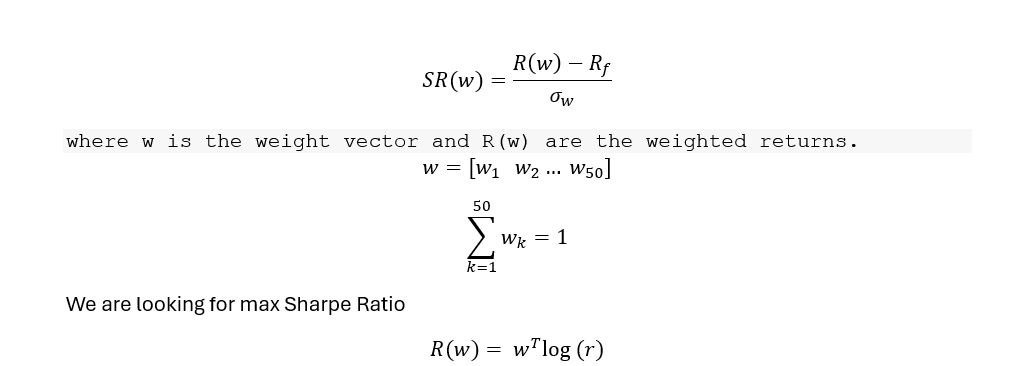

In [ ]:
nf_portfolios = 100000

#arrays used to store these metrics for each portfolio.
weight = np.zeros((nf_portfolios,50))
expected_return = np.zeros(nf_portfolios)
expected_volatility = np.zeros(nf_portfolios)
sharpe_ratio = np.zeros(nf_portfolios)

mean_returns = log_returns.mean()
sigma = log_returns.cov()

for k in range(nf_portfolios):

  #random weight vector
  w = np.array(np.random.rand(50))  #np.random object itself is not a function that generates random numbers. It is a module that contains various functions for generating random numbers. Therefore, you need to call a specific function within the np.random module to generate random numbers.
  w = w/np.sum(w)
  weight[k,:] = w

  # Expected return
  expected_return[k] = np.sum(mean_returns*w)

  # Expected volatility
  expected_volatility[k] = np.sqrt(np.dot(w.T, np.dot(sigma,w)))

  # Sharpe ratio
  sharpe_ratio[k] = expected_return[k]/expected_volatility[k]


In [ ]:
#expected return for each portfolio
expected_return

array([0.00364379, 0.00319083, 0.00356701, ..., 0.00345119, 0.00369353,
       0.00376828])

In [ ]:
#the weights of each stock that leads to the highest sharpe ratio
max_ratio = sharpe_ratio.argmax()
weight[max_ratio,:]

array([0.04010232, 0.02374526, 0.00211981, 0.01962632, 0.00039705,
       0.01388401, 0.01979435, 0.00805377, 0.01614817, 0.03154949,
       0.01990704, 0.03279326, 0.03937894, 0.02902618, 0.03296589,
       0.02966363, 0.00832622, 0.01689936, 0.01457609, 0.00107986,
       0.02539432, 0.00696655, 0.03348164, 0.0155853 , 0.02146275,
       0.00484865, 0.02253522, 0.00888108, 0.02084402, 0.02106815,
       0.00268328, 0.03017782, 0.00348887, 0.02747002, 0.02544725,
       0.00336669, 0.04108707, 0.03976905, 0.03078079, 0.00707517,
       0.03495188, 0.04039702, 0.02808443, 0.00938102, 0.01216956,
       0.02214199, 0.02310241, 0.02458435, 0.00922573, 0.00351088])

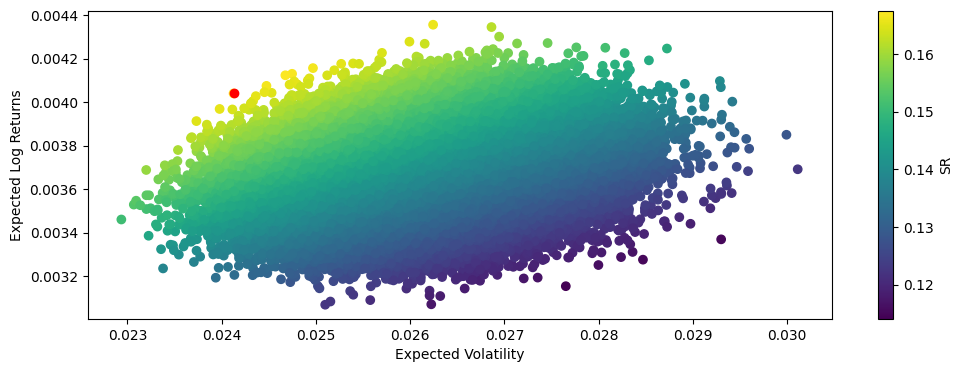

In [ ]:
#plotting all 1 lakh portfolios (the one indicating in red has the highest sharpe ratio)
plt.figure(figsize = (12,4))
plt.scatter(expected_volatility, expected_return, c = sharpe_ratio)
plt.xlabel('Expected Volatility')
plt.ylabel('Expected Log Returns')
plt.colorbar(label = 'SR')
plt.scatter(expected_volatility[max_ratio],expected_return[max_ratio], c = 'red')
plt.show()

Optimal weights:

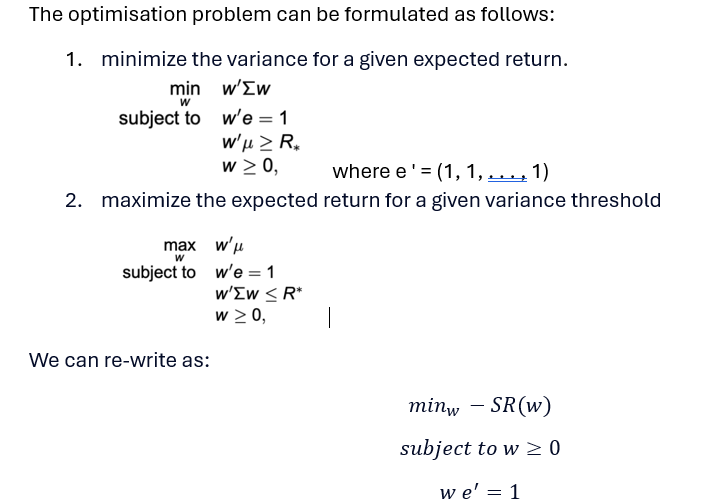

In [ ]:
def negative_sharpe_ratio(w):
  w = np.array(w)
  expected_return = np.sum(mean_returns*w)
  expected_volatility = np.sqrt(np.dot(w.T, np.dot(sigma,w)))
  sharpe_ratio = expected_return/expected_volatility
  return -sharpe_ratio  # We return the negative Sharpe ratio to maximize it

num_assets = log_returns.shape[1]
w0 = num_assets * [1. / num_assets,]
bounds = tuple((0,1)for i in range(log_returns.shape[1]))   #this creates a tuple of (0, 1) pairs, one for each asset.
constraints = ({'type' : 'eq' , 'fun' : lambda x: np.sum(x)-1}) # This specifies that the constraint is of type "equality" meaning the condition defined must be equal to zero.he function calculates the sum of all weights (np.sum(x)) and then subtracts 1.

opt_result = minimize(negative_sharpe_ratio, w0, method = 'SLSQP', bounds= bounds, constraints = constraints)
opt_result

 message: Optimization terminated successfully
 success: True
  status: 0
     fun: -0.25090681868902537
       x: [ 8.137e-02  0.000e+00 ...  0.000e+00  1.330e-16]
     nit: 10
     jac: [-1.831e-05  1.064e-01 ...  9.289e-02  1.083e-01]
    nfev: 511
    njev: 10

In [ ]:
opt_result.x

array([8.13669282e-02, 0.00000000e+00, 1.25225960e-01, 0.00000000e+00,
       0.00000000e+00, 1.27100351e-01, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 1.78104197e-01, 0.00000000e+00, 1.09395200e-02,
       0.00000000e+00, 5.96904118e-18, 1.52622632e-16, 0.00000000e+00,
       0.00000000e+00, 1.89453318e-16, 0.00000000e+00, 8.46308734e-17,
       0.00000000e+00, 8.75688072e-17, 0.00000000e+00, 0.00000000e+00,
       2.72736139e-17, 1.27323028e-16, 1.21288765e-16, 0.00000000e+00,
       0.00000000e+00, 1.75763572e-17, 8.14803344e-18, 5.58491174e-18,
       7.47858095e-17, 0.00000000e+00, 5.74394531e-02, 0.00000000e+00,
       2.19016846e-01, 3.87928384e-17, 0.00000000e+00, 1.22761756e-16,
       0.00000000e+00, 1.36455671e-01, 0.00000000e+00, 6.43510737e-02,
       7.70152002e-17, 6.86096687e-19, 6.42987880e-18, 2.12973729e-17,
       0.00000000e+00, 1.33023560e-16])

In [ ]:
df1 = pd.DataFrame({
    'Stock':log_returns.columns,
    'Weight': opt_result.x
})

sorted_df = df1.sort_values(by='Weight', ascending= False)
sorted_df.head(10)

,Stock,Weight
36,POWERGRID.NS,2.190168e-01
9,BHARTIARTL.NS,1.781042e-01
41,SUNPHARMA.NS,1.364557e-01
5,BAJAJ-AUTO.NS,1.271004e-01
2,APOLLOHOSP.NS,1.252260e-01
0,ADANIENT.NS,8.136693e-02
43,TATACONSUM.NS,6.435107e-02
34,NESTLEIND.NS,5.743945e-02
11,CIPLA.NS,1.093952e-02
17,HCLTECH.NS,1.894533e-16
